# Лабораторная работа 6

Временные ряда. Основы. Модель AR

Автор: Крючкова А.С ИВТ 1-2

Задание:

Книжному интернет­магазину необходимо уметь предсказывать объём заказов, чтобы выделить необходимое количество сотрудников на сбор и упаковку и уменьшить задержки. Вам предстоит решить задачу предсказания товарооборота этого магазина.

Датасет состоит из двух столбцов:

• date — дата заказа;

• quantity (qty) — количество книг, заказанных в этот день.

Скачайте датасет tovar_moving.zip и выполните следующие шаги. После вам необходимо будет
ответить на вопросы по выполненному заданию.
1. Отложите в test последнее значение временного ряда.
2. Проанализируйте временной ряд на наличие тренда и сезонности.
3. Постройте прогноз на одно последнее значение с помощью экспоненциального сглаживания
𝛼 = 0.7. Сравните результат с фактическим значением, которое вы отложили вначале.
4. Проверьте ряд на стационарность, определите порядок интегрирования.
5. Определите порядок модели AR по графику частичной автокорреляции.
6. Постройте модель AR и предскажите последнее значение ряда. Обратите внимание: модель
строится на исходном временном ряду.
7. Сравните полученные результаты.
Перед выполнением задания изучите ноутбук в архиве Exp_AR_TS.zip и датасет southern_osc.zip
для него.

# Импорты

In [19]:
%pip install pandas numpy statsmodels matplotlib

import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing, seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Загрузка данных

In [21]:
df = pd.read_csv("./data/tovar_moving.csv", index_col=['date'], parse_dates=['date'], dayfirst=True)

# Сезонная декомпозиция

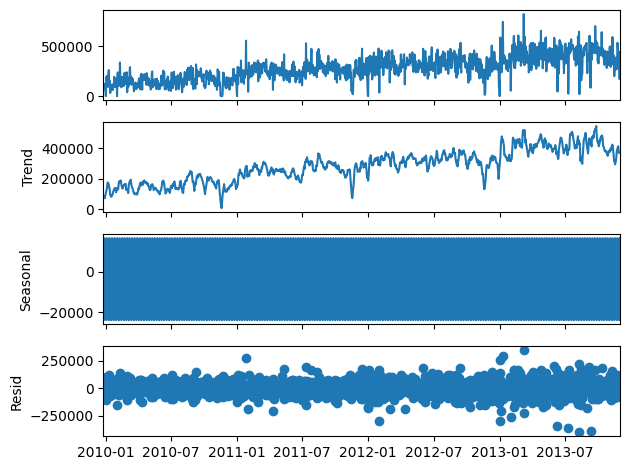

In [29]:
decomposition = seasonal_decompose(df, model='additive')
decomposition.plot()
plt.savefig('seasonal_decomposition.png')

# Экспоненциальное сглаживание

In [23]:
# Разделение на обучающую и тестовую выборки
test_df = df.iloc[-1]
train_df = df.iloc[:-1]

alpha = 0.7
ses = SimpleExpSmoothing(train_df)
model = ses.fit(smoothing_level=alpha, optimized=False)
exp_pred = model.forecast(1)

# Сравнение последних значений

In [24]:
print(f'Реальное последнее значение: {round(test_df.values[0], 3)}')
print(f'Предсказанное последнее значение: {round(exp_pred.values[0], 3)}')

Реальное последнее значение: 423846.0
Предсказанное последнее значение: 225015.523


# Проверка на стационарность

In [25]:
test = sm.tsa.adfuller(train_df)
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']: 
    print ('Единичные корни. Ряд не стационарен')
else:
    print ('Нет единичных корней. Ряд стационарен')

adf:  -2.2553026410337997
p-value:  0.18678903123416468
Critical values:  {'1%': -3.434973278556316, '5%': -2.8635818545830376, '10%': -2.567857072940785}
Единичные корни. Ряд не стационарен


# Графики автокорреляции и частичной автокорреляции

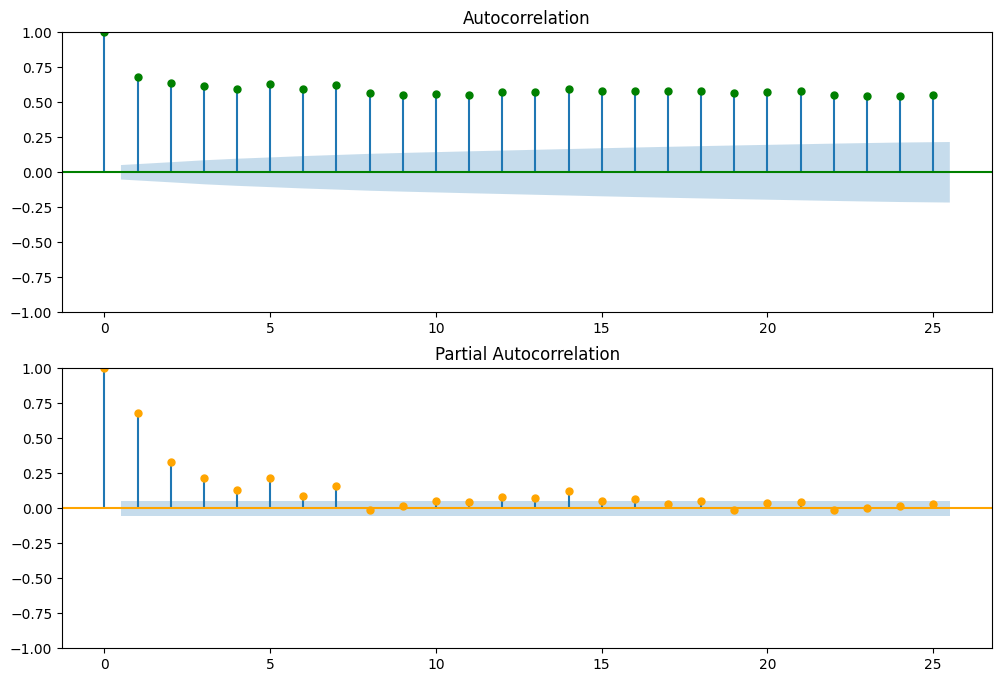

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(train_df.values.squeeze(), lags=25, ax=ax1, color='green')
sm.graphics.tsa.plot_pacf(train_df, lags=25, ax=ax2, color='orange')
plt.savefig('autocorrelation.png') 

# Модель авторегрессии

In [27]:
ar_model = AutoReg(train_df, lags=2).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    qty   No. Observations:                 1438
Model:                     AutoReg(2)   Log Likelihood              -18358.774
Method:               Conditional MLE   S.D. of innovations          86311.924
Date:                Wed, 29 May 2024   AIC                          36725.548
Time:                        16:43:33   BIC                          36746.627
Sample:                    12-27-2009   HQIC                         36733.418
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.062e+04   6035.468     10.043      0.000    4.88e+04    7.24e+04
qty.L1         0.4568      0.025     18.317      0.000       0.408       0.506
qty.L2         0.3284      0.025     13.181      0.0

# Предсказание с помощью модели AR

In [28]:
ar_pred = ar_model.predict(start=len(train_df), end=(len(train_df)), dynamic=False)
print(f'Предсказанное последнее значение ряда с помощью модели AR: {round(ar_pred.values[0], 3)}')

Предсказанное последнее значение ряда с помощью модели AR: 244842.054
